In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [182]:
# Read a CSV file without column names and use the second column as the index
df = pd.read_csv('data/consolidated_coin_data.csv', header=0, thousands=',')

# Display the DataFrame
print(df)

         Currency       Date  Open  High   Low  Close      Volume  Market Cap
0           tezos   4-Dec-19  1.29  1.32  1.25   1.25  46048752.0   824588509
1           tezos   3-Dec-19  1.24  1.32  1.21   1.29  41462224.0   853213342
2           tezos   2-Dec-19  1.25  1.26  1.20   1.24  27574097.0   817872179
3           tezos   1-Dec-19  1.33  1.34  1.25   1.25  24127567.0   828296390
4           tezos  30-Nov-19  1.31  1.37  1.31   1.33  28706667.0   879181680
...           ...        ...   ...   ...   ...    ...         ...         ...
28939  bitcoin-sv   2-May-13  3.78  4.04  3.01   3.37         0.0    58287979
28940  bitcoin-sv   1-May-13  4.29  4.36  3.52   3.80         0.0    65604596
28941  bitcoin-sv  30-Apr-13  4.40  4.57  4.17   4.30         0.0    74020918
28942  bitcoin-sv  29-Apr-13  4.37  4.57  4.23   4.38         0.0    75388964
28943  bitcoin-sv  28-Apr-13  4.30  4.40  4.18   4.35         0.0    74636938

[28944 rows x 8 columns]


In [183]:
print(df.dtypes)

Currency       object
Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume        float64
Market Cap      int64
dtype: object


In [184]:
# Convert the columns to their correct data types
df = df.astype({
    'Date': 'datetime64',
    'Market Cap': 'float64'
})

print(df.dtypes)

Currency              object
Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume               float64
Market Cap           float64
dtype: object


In [185]:
df.index = df.Date

print(df.index.min())
print(df.index.max())

2013-04-28 00:00:00
2019-12-04 00:00:00


In [195]:
q1_df = df.loc['2015':'2019']

In [196]:
print(q1_df.index.min())
print(q1_df.index.max())

2015-01-01 00:00:00
2019-12-04 00:00:00


In [197]:
# Group the DataFrame by Category and get the sum of values for each category
grouped_df = q1_df[['Currency', 'High']].groupby('Currency').max()

# Sort the DataFrame in descending order by the Value column
sorted_df = grouped_df.sort_values('High', ascending=False)

# Get the top 5 categories by value
top_currencies_high = sorted_df.index[:5]

In [198]:
sorted_df.head(5)

,High
Currency,
bitcoin,20089.00
bitcoin-cash,4355.62
ethereum,1432.88
litecoin,375.29
bitcoin-sv,255.88


In [199]:
top_currencies_high

Index(['bitcoin', 'bitcoin-cash', 'ethereum', 'litecoin', 'bitcoin-sv'], dtype='object', name='Currency')

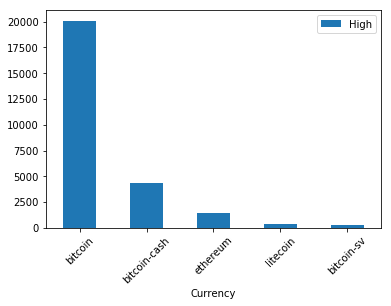

In [200]:
# Plot the top values as a bar chart
sorted_df[:5].plot(kind='bar', y='High', rot=45)
plt.show()

In [201]:
q1_df.dtypes

Currency              object
Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume               float64
Market Cap           float64
dtype: object

In [224]:
q1_df = q1_df[q1_df['Currency'].isin(top_currencies_high)]
print(q1_df)

              Currency       Date     Open     High      Low    Close  \
Date                                                                    
2019-12-04     bitcoin 2019-12-04  7320.13  7539.78  7170.92  7252.03   
2019-12-03     bitcoin 2019-12-03  7323.98  7418.86  7229.36  7320.15   
2019-12-02     bitcoin 2019-12-02  7424.04  7474.82  7233.40  7321.99   
2019-12-01     bitcoin 2019-12-01  7571.62  7571.62  7291.34  7424.29   
2019-11-30     bitcoin 2019-11-30  7764.06  7836.10  7515.85  7569.63   
...                ...        ...      ...      ...      ...      ...   
2015-01-05  bitcoin-sv 2015-01-05     1.96     2.16     1.96     2.08   
2015-01-04  bitcoin-sv 2015-01-04     2.11     2.15     1.91     1.96   
2015-01-03  bitcoin-sv 2015-01-03     2.67     2.67     2.13     2.13   
2015-01-02  bitcoin-sv 2015-01-02     2.70     2.70     2.66     2.67   
2015-01-01  bitcoin-sv 2015-01-01     2.72     2.72     2.69     2.70   

                  Volume    Market Cap  
Date     

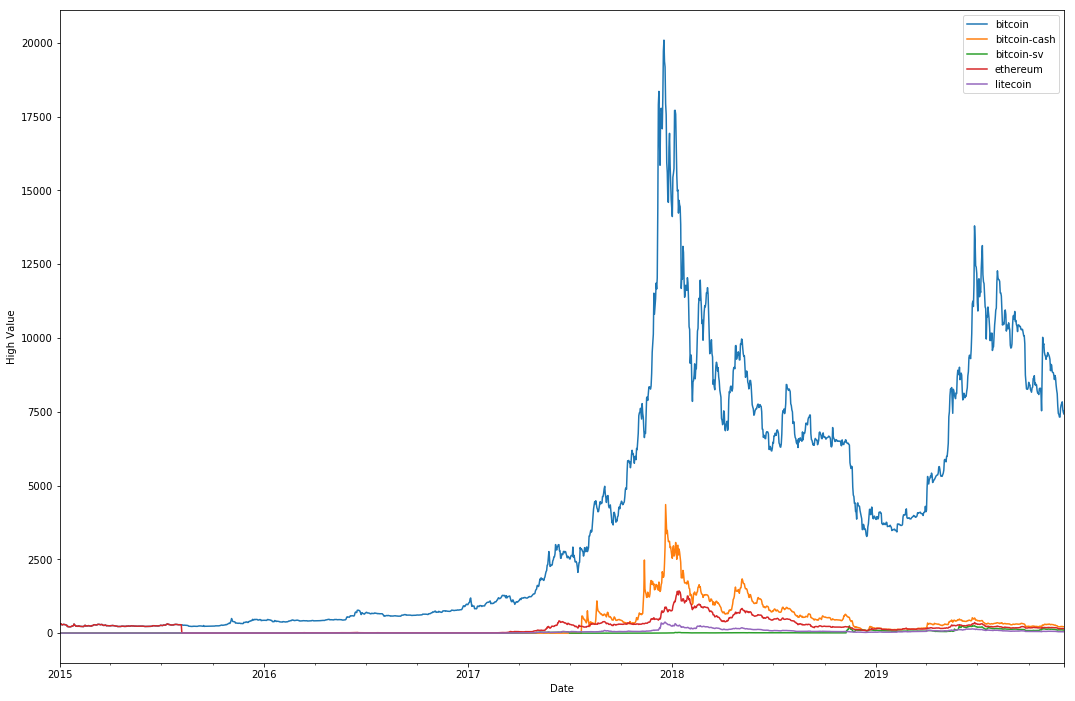

In [225]:
# Create a line plot of the "High" values between 2015 and 2019
fig, ax = plt.subplots(figsize=(18, 12))
q1_df.groupby('Currency')['High'].plot(ax=ax, legend=True)
ax.set_xlabel('Date')
ax.set_ylabel('High Value')
plt.show()

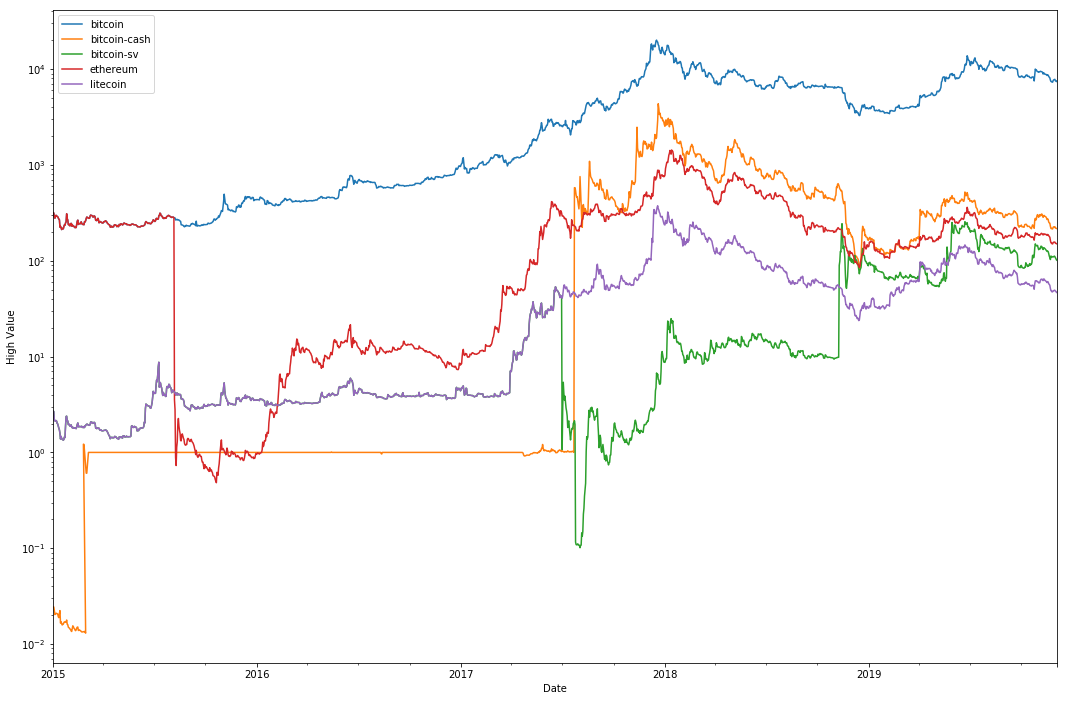

In [226]:
# Create a line plot of the "High" values between 2015 and 2019
fig, ax = plt.subplots(figsize=(18, 12))
q1_df.groupby('Currency')['High'].plot(ax=ax, legend=True)
ax.set_xlabel('Date')
ax.set_ylabel('High Value')
ax.set_yscale('log')
plt.show()

In [268]:
# Sort the DataFrame by "Date" in ascending order
q1_df = q1_df.sort_index()

# Calculate the percentage change in the "High" value for 
q1_df['High_pct_change'] = q1_df.groupby(['Currency'])['High'].pct_change()
q1_df.head(15)

,Currency,Date,Open,High,Low,Close,Volume,Market Cap,High_pct_change
Date,,,,,,,,,
2015-01-01,bitcoin-sv,2015-01-01,2.720000,2.720000,2.690000,2.700000,770693.0,9.508687e+07,NaN
2015-01-01,bitcoin-cash,2015-01-01,0.024455,0.024455,0.024205,0.024390,399022.0,7.555584e+08,NaN
2015-01-01,litecoin,2015-01-01,2.720000,2.720000,2.690000,2.700000,770693.0,9.508687e+07,NaN
2015-01-01,bitcoin,2015-01-01,320.430000,320.430000,314.000000,314.250000,8036550.0,4.297536e+09,NaN
2015-01-01,ethereum,2015-01-01,320.430000,320.430000,314.000000,314.250000,8036550.0,4.297536e+09,NaN
2015-01-02,litecoin,2015-01-02,2.700000,2.700000,2.660000,2.670000,855392.0,9.404872e+07,-0.007353
2015-01-02,bitcoin-cash,2015-01-02,0.024377,0.024423,0.024309,0.024318,459956.0,7.533403e+08,-0.001309
2015-01-02,ethereum,2015-01-02,314.080000,315.840000,313.570000,315.030000,7860650.0,4.309551e+09,-0.014325
2015-01-02,bitcoin,2015-01-02,314.080000,315.840000,313.570000,315.030000,7860650.0,4.309551e+09,-0.014325


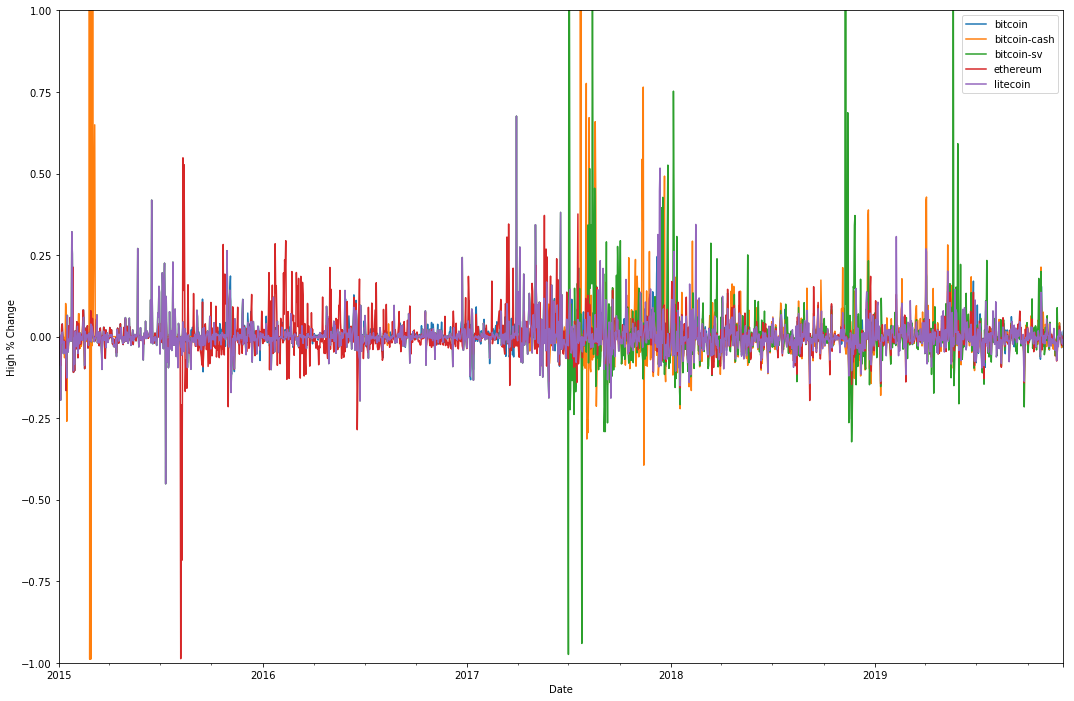

In [278]:
# Create a line plot of the "High % change" values between 2015 and 2019
fig, ax = plt.subplots(figsize=(18, 12))
q1_df.groupby('Currency')['High_pct_change'].plot(ax=ax, legend=True)
ax.set_xlabel('Date')
ax.set_ylabel('High % Change')
ax.set_ylim([-1,1])
plt.show()

In [211]:
q2_df = df.loc['2016':'2019']

In [212]:
print(q2_df.index.min())
print(q2_df.index.max())

2016-01-01 00:00:00
2019-12-04 00:00:00


In [213]:
# Group the DataFrame by Category and get the sum of values for each category
grouped_df = q2_df[['Currency', 'Volume']].groupby('Currency').max()

# Sort the DataFrame in descending order by the Value column
sorted_df = grouped_df.sort_values('Volume', ascending=False)

# Get the top 5 categories by value
top_currencies_volume = sorted_df.index[:3]

In [214]:
sorted_df.head(3)

,Volume
Currency,
tether,5.350913e+10
bitcoin,4.510573e+10
ethereum,1.866147e+10


In [215]:
top_currencies_volume

Index(['tether', 'bitcoin', 'ethereum'], dtype='object', name='Currency')

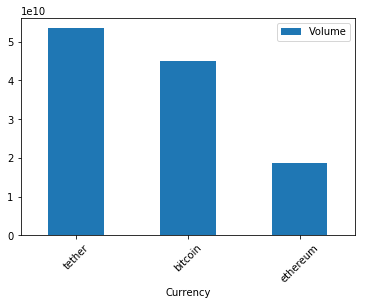

In [216]:
# Plot the top values as a bar chart
sorted_df[:3].plot(kind='bar', y='Volume', rot=45)
plt.show()

In [223]:
q2_df = q2_df[q2_df['Currency'].isin(top_currencies_volume)]
print(q2_df)

            Currency       Date         Open         High          Low  \
Date                                                                     
2019-12-04   bitcoin 2019-12-04  7320.130000  7539.780000  7170.920000   
2019-12-03   bitcoin 2019-12-03  7323.980000  7418.860000  7229.360000   
2019-12-02   bitcoin 2019-12-02  7424.040000  7474.820000  7233.400000   
2019-12-01   bitcoin 2019-12-01  7571.620000  7571.620000  7291.340000   
2019-11-30   bitcoin 2019-11-30  7764.060000  7836.100000  7515.850000   
...              ...        ...          ...          ...          ...   
2016-01-05  ethereum 2016-01-05     0.953147     0.970597     0.946543   
2016-01-04  ethereum 2016-01-04     0.972045     0.976438     0.929835   
2016-01-03  ethereum 2016-01-03     0.938430     0.991362     0.934313   
2016-01-02  ethereum 2016-01-02     0.947401     0.969637     0.936560   
2016-01-01  ethereum 2016-01-01     0.933712     0.954822     0.931442   

                  Close        Volume

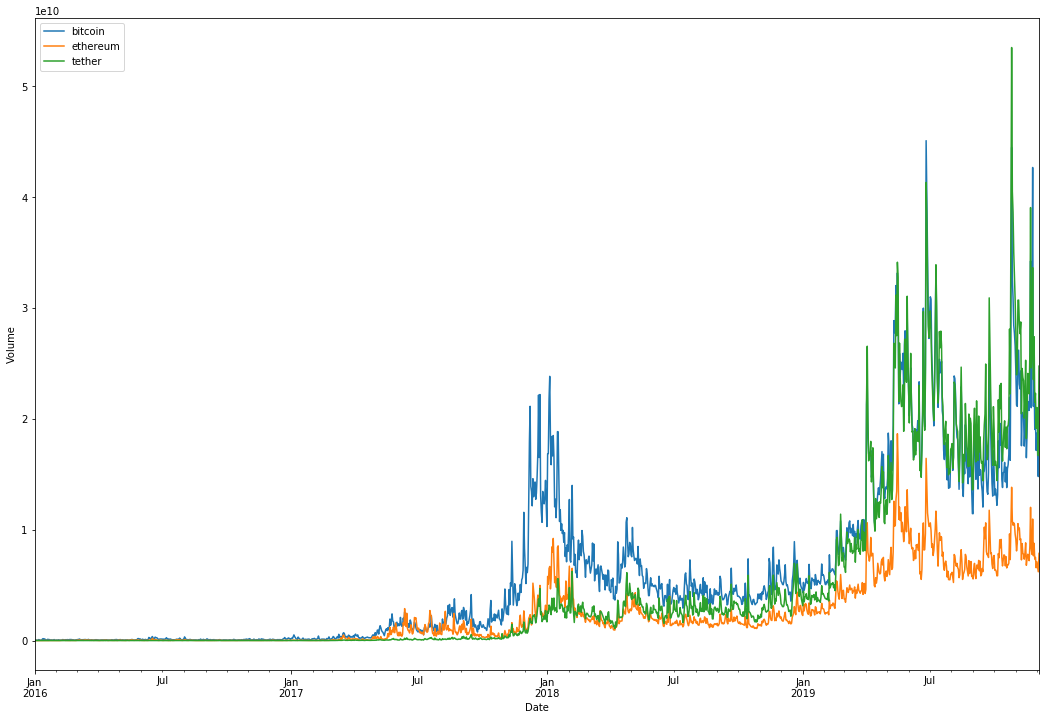

In [227]:
# Create a line plot of the "Volume" values between 2016 and 2019
fig, ax = plt.subplots(figsize=(18, 12))
q2_df.groupby('Currency')['Volume'].plot(ax=ax, legend=True)
ax.set_xlabel('Date')
ax.set_ylabel('Volume')
plt.show()

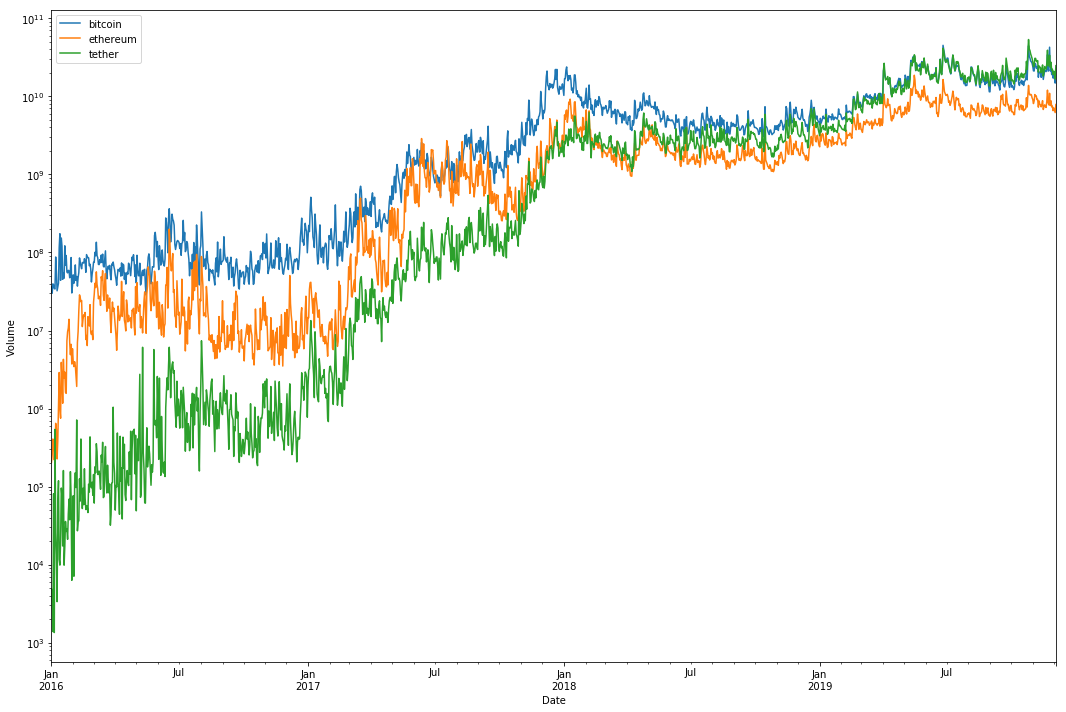

In [228]:
# Create a line plot of the "Volume" values between 2016 and 2019
fig, ax = plt.subplots(figsize=(18, 12))
q2_df.groupby('Currency')['Volume'].plot(ax=ax, legend=True)
ax.set_xlabel('Date')
ax.set_ylabel('Volume')
ax.set_yscale('log')
plt.show()

In [284]:
# Sort the DataFrame by "Date" in ascending order
q2_df = q2_df.sort_index()

# Calculate the percentage change in the "High" value for 
q2_df['Volume_pct_change'] = q2_df.groupby(['Currency'])['Volume'].pct_change()
q2_df.head(15)

,Currency,Date,Open,High,Low,Close,Volume,Market Cap,Volume_pct_change
Date,,,,,,,,,
2016-01-01,ethereum,2016-01-01,0.933712,0.954822,0.931442,0.948024,206062.00,7.198039e+07,NaN
2016-01-01,bitcoin,2016-01-01,430.720000,436.250000,427.520000,434.330000,36278900.00,6.529300e+09,NaN
2016-01-01,tether,2016-01-01,1.000000,1.000000,1.000000,1.000000,4875.58,9.516000e+05,NaN
2016-01-02,bitcoin,2016-01-02,434.620000,436.060000,431.870000,433.440000,30096600.00,6.517390e+09,-0.170410
2016-01-02,tether,2016-01-02,1.000000,1.000000,1.000000,1.000000,4701.21,9.516000e+05,-0.035764
2016-01-02,ethereum,2016-01-02,0.947401,0.969637,0.936560,0.937124,255504.00,7.117666e+07,0.239937
2016-01-03,tether,2016-01-03,1.000000,1.000000,1.000000,1.000000,1388.86,9.516000e+05,-0.704574
2016-01-03,ethereum,2016-01-03,0.938430,0.991362,0.934313,0.971905,407632.00,7.384329e+07,0.595404
2016-01-03,bitcoin,2016-01-03,433.580000,433.740000,424.710000,430.010000,39633800.00,6.467430e+09,0.316886


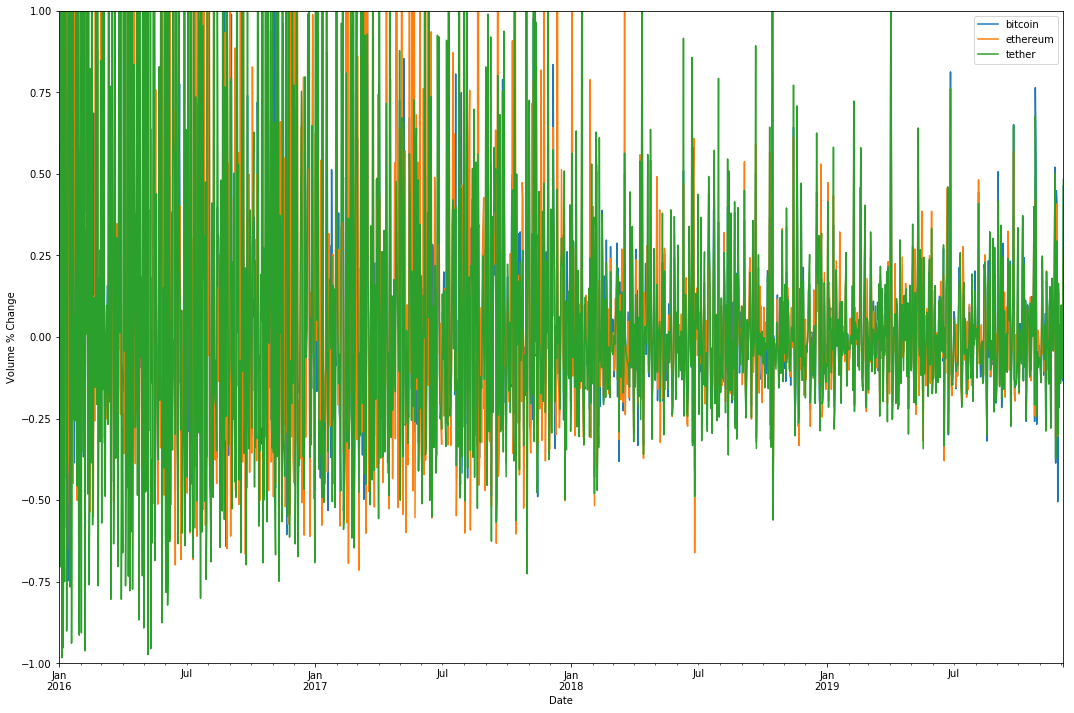

In [292]:
# Create a line plot of the "Volume % change" values between 2016 and 2019
fig, ax = plt.subplots(figsize=(18, 12))
q2_df.groupby('Currency')['Volume_pct_change'].plot(ax=ax, legend=True)
ax.set_xlabel('Date')
ax.set_ylabel('Volume % Change')
ax.set_ylim([-1,1])
plt.show()

When creating pandas data visualizations for young adults vs senior citizens, there are several design choices to consider to ensure that the visualizations are accessible and understandable for both age groups. Some of these design choices are:   


1. **Font size and style**: Senior citizens may have difficulty reading small fonts or fonts with a complex style. Therefore, it's recommended to use a larger font size and a simple font style that is easy to read. For young adults, a smaller font size may be acceptable as long as it is still legible.

2. **Color choice**: Color can be used to highlight important information and draw attention to specific parts of a visualization. However, it's important to use colors that are easily distinguishable for both young adults and senior citizens. High-contrast colors can make it easier for both groups to differentiate between different elements in the visualization.

3. **Data density**: The amount of data displayed in a visualization can affect its accessibility. Senior citizens may prefer a simpler visualization with fewer data points, while young adults may be able to process more complex visualizations. It may be helpful to provide different levels of detail or allow users to interact with the visualization to control the amount of data displayed.

4. **Chart type**: Different types of charts may be more appropriate for different age groups. For example, young adults may prefer interactive charts that allow them to explore the data, while senior citizens may prefer simpler charts that are easier to read and interpret.

5. **Accessibility features**: It's important to consider accessibility features, such as alternative text and screen reader compatibility, for senior citizens who may have visual or hearing impairments.  


Overall, the goal should be to create visualizations that are accessible, easy to understand, and engaging for both young adults and senior citizens.